## Univelcity Virtual Intership -- Week 1

#### Instruction :There are two documents attached; one contains the list of people who registered for a program while the other contains the list of those that eventually got enrolled.

1. Applying Data Analysis and Visualization, glean out insights from both datasets with respect to the Gender of the applicants.
2. What is the probability that a randomly selected registered female will be enrolled in the program?
3. What is the probability that a randomly selected registered male will be enrolled in the program?
4. What is the probability that a registered applicant will eventually enroll in the program?



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(context='paper', 
              style='whitegrid', 
              palette='coolwarm_r')

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
enrolled = pd.read_csv('enrolled applicants.csv')
registered = pd.read_csv('registered applicants.csv')

## Data Wrangling
#### Enrolled

In [3]:
enrolled.head()

,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
0,1120,Robert,Mccain,WEBSITE,Full Stack,Weekday,Male
1,2557,Russel,Reagin,Mr Simps,Full Stack,Weekday,Male
2,1682,Barry,Dickson,WEBSITE,Full Stack,Weekday,Male
3,1961,Allen,Williams,Mr Simps,NaN,Weekday,Male
4,295,Brian,Bryon,Social Media,Python For Data Science,Weekend,Male


In [4]:
enrolled['GENDER'].value_counts()

Male      1611
Female     142
male        12
female       1
Name: GENDER, dtype: int64

In [5]:
enrolled['GENDER'] = enrolled['GENDER'].apply(lambda x: x.capitalize())
enrolled['GENDER'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
enrolled.describe(include='O').T

,count,unique,top,freq
FIRST NAME,1766,550,James,63
LAST NAME,1766,1323,Williams,16
SOURCE,1754,3,Social Media,1096
COURSE,1741,13,Full Stack,310
TRACK,1766,3,Weekday,1131
GENDER,1766,2,Male,1623


#### Registered

In [7]:
registered.head()

,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
0,2373,Brian,May,Social Media,Python For DataScience,Weekend,Male
1,758,Leon,Melvin,Social Media,Product Design(UI/UX),Weekend,Male
2,2287,Juan,Harris,Mr Simps,Product Design(UI/UX),Weekday,Male
3,2480,Gilbert,Denson,Social Media,Figma Design to Webflow,Weekend,Male
4,1359,Larry,Williams,WEBSITE,Python For DataScience,Weekday,Male


In [8]:
# Missing values
registered.isnull().mean().round(3)

Unnamed: 0    0.000
FIRST NAME    0.000
LAST NAME     0.000
SOURCE        0.007
COURSE        0.007
TRACK         0.000
GENDER        0.015
dtype: float64

In [9]:
missing_features = [x for x in registered.columns if registered[x].isnull().mean()]

for missing in missing_features:
    registered[missing] = registered[missing].replace(np.NaN, registered[missing].mode()[0])

In [10]:
registered['GENDER'].unique()

array(['Male', 'Female', 'male', 'female'], dtype=object)

In [11]:
registered['GENDER'] = registered['GENDER'].apply(lambda x: str(x).capitalize())
registered['GENDER'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
registered.describe(include='O').T

,count,unique,top,freq
FIRST NAME,3676,921,James,121
LAST NAME,3676,2453,Williams,33
SOURCE,3676,3,Social Media,2251
COURSE,3676,13,Full Stack,693
TRACK,3676,3,Weekday,2312
GENDER,3676,2,Male,2959


### Merge

In [13]:
data = registered.merge(right=enrolled[['Unnamed: 0']], sort=True, how='outer', on='Unnamed: 0', indicator=True)
data['status'] = np.where(data['_merge']=='both', 'Enrolled', 'Not_Enrolled')
data = data.drop(['_merge'], axis=1)
data.head()

,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER,status
0,1,Rodney,Doe,WEBSITE,Full Stack,Weekday,Male,Not_Enrolled
1,2,James,Stanger,WEBSITE,Full Stack,Weekday,Male,Enrolled
2,3,Gilbert,Vance,WEBSITE,Full Stack,Weekday,Male,Not_Enrolled
3,4,Brett,Schmidt,WEBSITE,Full Stack,Weekday,Male,Enrolled
4,5,Candice,Koetter,WEBSITE,Python For Data Science,Weekday,Female,Not_Enrolled


In [14]:
data.describe(include='O')

,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER,status
count,3676,3676,3676,3676,3676,3676,3676
unique,921,2453,3,13,3,2,2
top,James,Williams,Social Media,Full Stack,Weekday,Male,Not_Enrolled
freq,121,33,2251,693,2312,2959,1910


In [15]:
data['COURSE'].unique()

array(['Full Stack', 'Python For Data Science', 'Product Design(UI/UX)',
       'Backend With Python Django', 'Figma Design to Webflow',
       'Frontend', 'Product Design(UI/UX) ONLINE', 'CyberSecurity',
       'Frontend Web Development', 'FullStack', 'Product Management',
       'Python For DataScience', 'Product Design'], dtype=object)

In [16]:
#  Cleaning Courses column

data['COURSE'] = data['COURSE'].apply(lambda x:str(x).replace(' ',''))
data['COURSE']= data['COURSE'].replace(['ProductDesign(UI/UX)','ProductDesign(UI/UX)ONLINE'], 'ProductDesign')
data['COURSE'] =data['COURSE'].replace(['FrontendWebDevelopment'], 'Frontend')
data['COURSE'] =data['COURSE'].replace(['nan'], data['COURSE'].mode()[0])

data['COURSE'].unique()

array(['FullStack', 'PythonForDataScience', 'ProductDesign',
       'BackendWithPythonDjango', 'FigmaDesigntoWebflow', 'Frontend',
       'CyberSecurity', 'ProductManagement'], dtype=object)

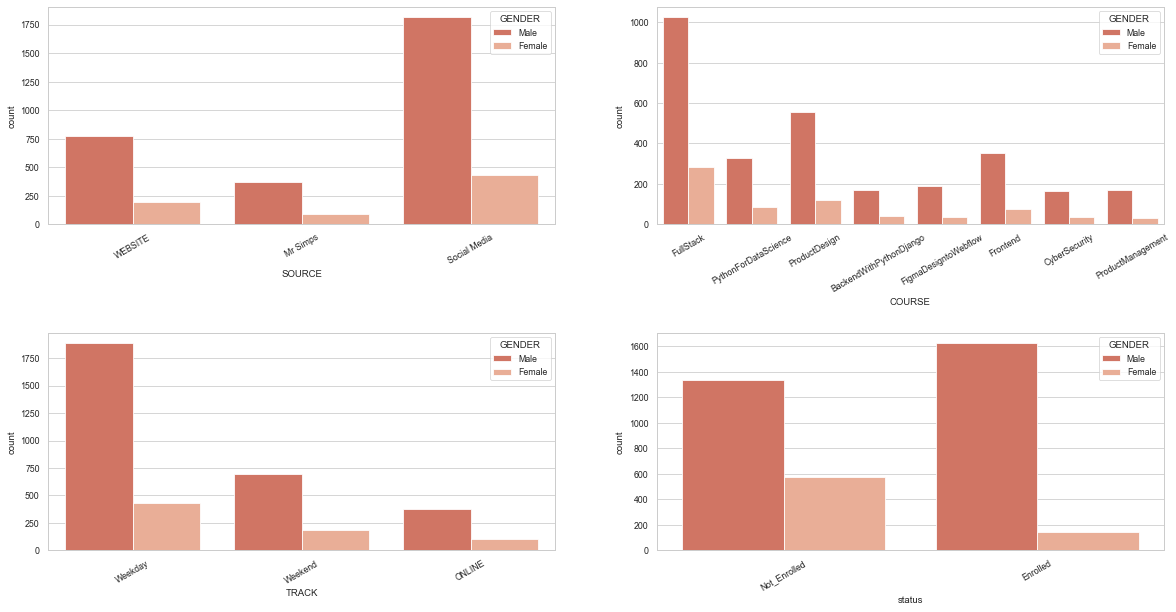

In [17]:
features = [x for x in data.columns if data[x].dtypes and data[x].nunique() < 10]
features.pop(-2)
features

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2,3))
fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for feature, ax in zip(features, axs.flatten()):
    sns.countplot(x=data[feature], ax=ax, hue='GENDER', data=data)
#     ax.set_title(feature)
    ax.tick_params(axis='x', labelrotation=30)

plt.show()

###### Question 2 & 3: What is the probability that a randomly selected registered Female / Male will be enrolled in the program?

##### Female

In [18]:
num_female_enrolled = len(data[(data['GENDER']=='Female') & (data['status'] == 'Enrolled')])
total_number_female = len(data[(data['GENDER']=='Female')])

print('Probability of randomly selecting a Female who enrolled is {}'.format(round(num_female_enrolled/total_number_female,3)))

Probability of randomly selecting a Female who enrolled is 0.199


##### Male

In [19]:
num_male_enrolled = len(data[(data['GENDER']=='Male') & (data['status'] == 'Enrolled')])
total_number_male = len(data[(data['GENDER']=='Male')])

print('Probability of randomly selecting a Male who enrolled is {}'.format(round(num_male_enrolled/total_number_male,3)))

Probability of randomly selecting a Male who enrolled is 0.548


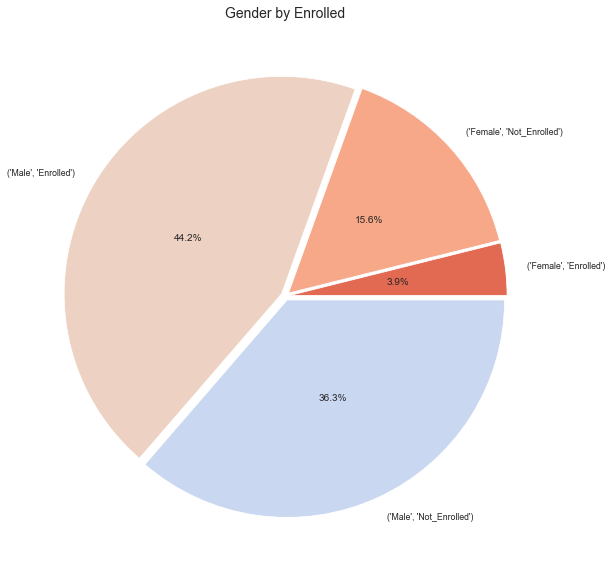

In [20]:
gender_enrolled = data[['GENDER','status']].groupby(['GENDER','status'])['status'].count()

pie, ax = plt.subplots(figsize=[10,10])
labels = gender_enrolled.keys()
plt.pie(x=gender_enrolled, autopct="%.1f%%", explode=[0.02]*4, labels=labels, pctdistance=0.5)
plt.title("Gender by Enrolled", fontsize=14);
plt.show()

###### Question 4: What is the probability that a registered applicant will eventually enroll in the program?

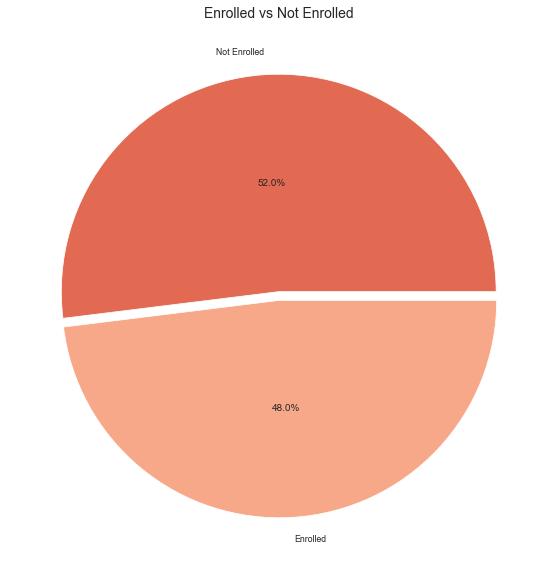

In [21]:
status_data = list(data['status'].value_counts())
label=['Not Enrolled', 'Enrolled']

plt.figure(figsize=(10, 10))

plt.pie(x = status_data, labels=label,autopct="%.1f%%",explode=[0.02]*2, pctdistance=0.5)
plt.title('Enrolled vs Not Enrolled', fontsize=14)
plt.show()

In [22]:
num_enrolled = len(data[(data['status']=='Enrolled')])
total_number_enrolled = len(data)

print('Probability of randomly selecting a person who enrolled is {}'.format(round(num_enrolled/total_number_enrolled,2)))

Probability of randomly selecting a person who enrolled is 0.48


### Conclusion

In [23]:
print('1. Probability of randomly selecting a Female who enrolled is {}'.format(round(num_female_enrolled/total_number_female,2)))
print('2. Probability of randomly selecting a Male who enrolled is {}'.format(round(num_male_enrolled/total_number_male,2)))
print('3. Probability of randomly selecting a person who enrolled is {}'.format(round(num_enrolled/total_number_enrolled,2)))

1. Probability of randomly selecting a Female who enrolled is 0.2
2. Probability of randomly selecting a Male who enrolled is 0.55
3. Probability of randomly selecting a person who enrolled is 0.48
